HW 1 Question 1:

part a)

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Comparison ...')
plt.subplots_adjust(wspace=.25)

ax[0].semilogx(dxplot, plot1_
ax[0].semilogx(dxplot, plot2)
ax.set(xlabel = '$\Delta$x', ylabel = '..')
ax[0].legend()

same for ax[1]


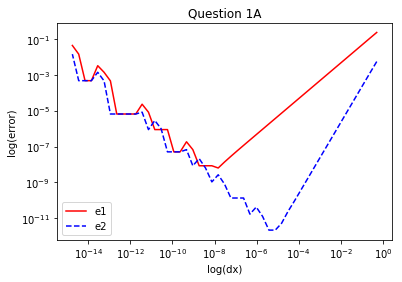

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.cos(x)

def fp(x):
    return -math.sin(x)

x = 3.0
dx = 0.1

dx_list = []
error1_list = []
error2_list = []

for n in range(1, 50):

    dx = 2**(-n)
    
    deriv1 = (f(x+dx)-f(x))/dx
    deriv2 = (f(x+dx)-f(x-dx))/(2*dx)
    
    error1 = abs(deriv1 - fp(x))
    error2 = abs(deriv2 - fp(x))
    
    dx_list.append(dx)
    error1_list.append(error1)
    error2_list.append(error2)
    

plt.loglog(dx_list, error1_list, 'r-', label = 'e1')
plt.loglog(dx_list, error2_list, 'b--',label = 'e2')
plt.title('Question 1A')
plt.xlabel('log(dx)')
plt.ylabel('log(error)')
plt.legend()


# print(x, deriv, fp(x), abs(deriv-fp(x)))

part b)

In [2]:
dx = np.array([.1, .05, .025])
deriv = (f(x+dx)-f(x-dx))/(2*dx)

p = np.polyfit(dx, deriv, 2)
print('Q1 part b)')
print('p1:', p[0], 'p2:', p[1], 'p3:', p[2],'\n')
print('True derivative at dx = 0:', fp(x))
print('Extrapolated derivative from polynomial fitting:', p[2], 'with an error of:', abs(fp(x) - p[2]))
print('The error of the smallest dx:', abs(fp(x) - deriv[-1]))

p1: 0.023494283459872763 p2: 1.6532335417270845e-06 p3: -0.1411200337763976 

True derivative at dx = 0: -0.1411200080598672
Extrapolated derivative from polynomial fitting: -0.1411200337763976 with an error of: 2.5716530377417612e-08
The error of the smallest dx: 1.4699541470569732e-05


part c)

In [3]:
dx = np.array([.1, .05, .025, .0125])
deriv = (f(x+dx)-f(x-dx))/(2*dx)

p = np.polyfit(dx, deriv, 3)
print('Q1 part c)')
print('p1:', p[0], 'p2:', p[1], 'p3:', p[2],'p4:', p[3], '\n')
print('True derivative at dx = 0:', fp(x))
print('Extrapolated derivative from polynomial fitting:', p[3], 'with an error of:', abs(fp(x) - p[3]))
print('The error of the smallest dx:', abs(fp(x) - deriv[-1]))

p1: -0.00022042382249622494 p2: 0.023532857628819914 p3: -2.7547490426023543e-07 p4: -0.14112000622341977 

True derivative at dx = 0: -0.1411200080598672
Extrapolated derivative from polynomial fitting: -0.14112000622341977 with an error of: 1.8364474385634821e-09
The error of the smallest dx: 3.6749715003059347e-06


Question 2)

The final errors for N = 20^20; Basic: 7.937380803735294e-07 Trapezoidal: 9.80715508802632e-13 Simpsons: 5.551115123125783e-17


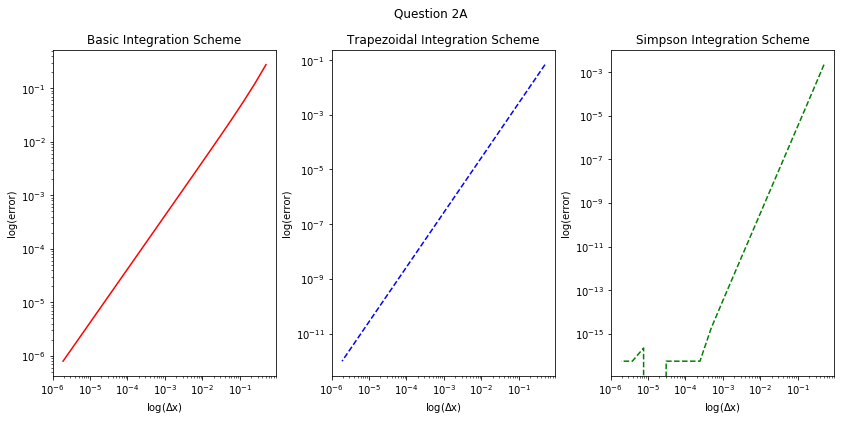

In [5]:
dx = 0

def f(x):
    return x * np.cos(x)

def fi(x):
    return x*np.sin(x) + np.cos(x)

def basic(f, x, dx):
    return dx * f(x).sum()

def trapezoidal(f, x, dx):
    return dx*(.5*(f(x[0]) + f(x[-1])) + f(x[1:-1]).sum())

def simpsons(f, x, dx):
    return dx*(f(x[0]) + f(x[-1]) + 4*f(x[1:-1:2]).sum() + 2*f(x[2:-2:2]).sum())/3

basic_error = []
trapezoidal_error = []
simpsons_error = []
dxplot = []

xmax = 2
xmin = 0

N = 4
Nmax = 2 ** 20
true_int = fi(xmax) - fi(xmin)



while N <= Nmax:
    
    x = np.linspace(xmin, xmax, N+1) #add another rectangle
    dx = (xmax-xmin)/N
    dxplot.append(dx)
    
    basic_error.append(abs(basic(f, x, dx) - true_int))
    trapezoidal_error.append(abs(trapezoidal(f, x, dx) - true_int))
    simpsons_error.append(abs(simpsons(f, x, dx) - true_int))

    
    N *= 2


fig, ax = plt.subplots(1,3, figsize = (14, 6))
fig.suptitle('Question 2A')
plt.subplots_adjust(wspace=.25)

ax[0].loglog(dxplot, basic_error, 'r-')
ax[0].set(xlabel = 'log($\Delta$x)', ylabel = 'log(error)', title = 'Basic Integration Scheme')
                          
ax[1].loglog(dxplot, trapezoidal_error, 'b--')
ax[1].set(xlabel = 'log($\Delta$x)', ylabel = 'log(error)', title = 'Trapezoidal Integration Scheme')

ax[2].loglog(dxplot, simpsons_error, 'g--')
ax[2].set(xlabel = 'log($\Delta$x)', ylabel = 'log(error)', title = 'Simpson Integration Scheme')

print('The final errors for N = 20^20; Basic:', basic_error[-1], 'Trapezoidal:', trapezoidal_error[-1], 'Simpsons:', simpsons_error[-1])


In [5]:
N = 4
Nmax = 32
trapezoidal_vals = []

dxplot = []


while N <= Nmax:
    
    x = np.linspace(xmin, xmax, N+1) #add another rectangle
    dx = (xmax-xmin)/N


    
    dxplot.append(dx)
    trapezoidal_vals.append(trapezoidal(f, x, dx))
        
    N *= 2
    
trapezoidal_error = abs(trapezoidal_vals - true_int)

p = np.polyfit(dxplot, trapezoidal_vals, 3)

print('p1:', p[0], 'p2:', p[1], 'p3:', p[2],'p4:', p[3], '\n')
print('True integral:', true_int)
print('Extrapolated integral from polynomial fitting:', p[3], 'with an error of:', abs(p[3] - true_int))
print('The error with dx = 1/16:', trapezoidal_error[2])

p1: -0.00800091966070037 p2: -0.26721638680999354 p3: -0.000251867463712889 p4: 0.4024564217758112 

True integral: 0.40244801710422107
Extrapolated integral from polynomial fitting: 0.4024564217758112 with an error of: 8.40467159013425e-06
The error with dx = 1/16: 0.004213961601492566


Question 3)
a

In [6]:
GM = 1
epsilon = .1

def theta(r):
    return -1/np.sqrt(np.power(r, 2) + epsilon**2)

def v2(r):
    return 2/((r**2 + epsilon**2)**.5) - 1/(2*r**2) - 1

def bisection(a, b, h, error):
    if h(a) < 0:
        while abs(a-b) > error:
            m = (a+b)/2
            y = h(m)
            if y < 0:
                a = m
            elif y > 0:
                b = m
    else:
        while abs(a-b) > error:
            m = (a+b)/2
            y = h(m)
            if y < 0:
                b = m
            elif y > 0:
                a = m   
    return m


rl = bisection(.001, 1, v2, 1e-9)
ru = bisection(1.2, 2, v2, 1e-9)

print('root 1:', rl)
print('root 2:', ru)



root 1: 0.314143624943681
root 2: 1.7029530502855779


In [7]:
def gauss_cheb(f, n):

    x = []
    r = []
    for i in range(n):
        #x.append(math.cos((2*i+1)*math.pi/(2.*n)))
        xi = math.cos((2*i+1)*math.pi/(2*n))
        ri = (ru + rl)/2 + xi*(ru - rl)/2
        r.append(ri)
        
    w = math.pi/n

    sum = 0.0
    for i in range(len(r)):
        sum += w*f(r[i])
    return sum

def func(r):
    return 2 * np.power((r - rl), .5)* np.power((ru - r), .5) * np.power(v2(r), -.5)
    
integral = gauss_cheb(func, 10)
print('integral =', integral)

integral = 6.286959421352375


Q3) b

In [8]:
GM = 1
epsilon = 0

def theta(r):
    return -1/np.sqrt(np.power(r, 2) + epsilon**2)

def v2(r):
    return 2/((r**2 + epsilon**2)**.5) - 1/(2*r**2) - 1

def bisection(a, b, h, error):
    if h(a) < 0:
        while abs(a-b) > error:
            m = (a+b)/2
            y = h(m)
            if y < 0:
                a = m
            elif y > 0:
                b = m
    else:
        while abs(a-b) > error:
            m = (a+b)/2
            y = h(m)
            if y < 0:
                b = m
            elif y > 0:
                a = m   
    return m

def gauss_cheb(f, n):

    x = []
    r = []
    for i in range(n):
        #x.append(math.cos((2*i+1)*math.pi/(2.*n)))
        xi = math.cos((2*i+1)*math.pi/(2*n))
        ri = (ru + rl)/2 + xi*(ru - rl)/2
        r.append(ri)
        
    w = math.pi/n

    sum = 0.0
    for i in range(len(r)):
        sum += w*f(r[i])
    return sum

def func(r):
    return 2 * np.power((r - rl), .5)* np.power((ru - r), .5) * np.power(v2(r), -.5)

rl = bisection(.001, 1, v2, 1e-9)
ru = bisection(1.2, 2, v2, 1e-9)



integral = gauss_cheb(func, 10)
actual_integral = 2*np.pi*np.power((2*.5), -3/2)

print('root 1:', rl)
print('root 2:', ru)
print('computed integral =', integral)
print('Actual integral:', actual_integral )



root 1: 0.2928932189336046
root 2: 1.7071067817509176
computed integral = 6.283185348420567
Actual integral: 6.283185307179586
